## Evaluation Metrixs for Classification

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [95]:
df = pd.read_csv('data_week_3.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [96]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [97]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [98]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [99]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

np.float64(0.8026969481902059)

## Accuracy and Dummy Model

- Evaluate model on different thresholds
- Check the accuracy of dummy baselines

In [100]:
len(y_val)

1409

In [101]:
#Correct decisions
(y_val == churn_decision).sum()

np.int64(1131)

In [102]:
accuracy = ((y_val == churn_decision).sum())/len(y_val)
accuracy

np.float64(0.8026969481902059)

In [103]:
# Create thresholds and gauge which one will give us the best accuracy
thresholds = np.linspace(0,1,21)
scores = []

for t in thresholds:
    churn_decision = (y_pred >= t)
    score = (y_val == churn_decision).mean()
    print(f'Accuracy = {score:.3f}, t = {t:.2f}')
    scores.append(score)

Accuracy = 0.274, t = 0.00
Accuracy = 0.508, t = 0.05
Accuracy = 0.591, t = 0.10
Accuracy = 0.666, t = 0.15
Accuracy = 0.709, t = 0.20
Accuracy = 0.737, t = 0.25
Accuracy = 0.760, t = 0.30
Accuracy = 0.773, t = 0.35
Accuracy = 0.785, t = 0.40
Accuracy = 0.792, t = 0.45
Accuracy = 0.803, t = 0.50
Accuracy = 0.801, t = 0.55
Accuracy = 0.795, t = 0.60
Accuracy = 0.786, t = 0.65
Accuracy = 0.766, t = 0.70
Accuracy = 0.744, t = 0.75
Accuracy = 0.734, t = 0.80
Accuracy = 0.726, t = 0.85
Accuracy = 0.726, t = 0.90
Accuracy = 0.726, t = 0.95
Accuracy = 0.726, t = 1.00


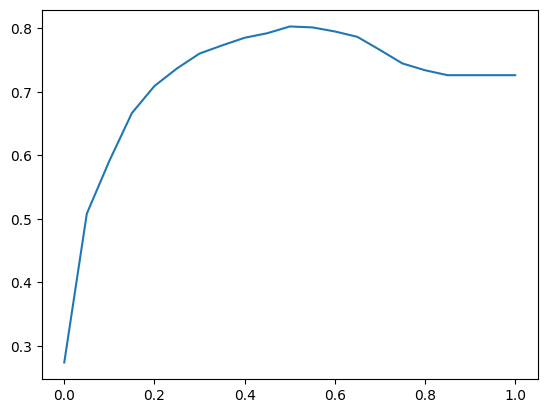

In [104]:
plt.plot(thresholds,scores)

Using the Scikitlearn module to test accuracies

In [105]:
from sklearn.metrics import accuracy_score

In [106]:
accuracy_score(y_val,churn_decision)

0.7260468417317246

In [107]:
#Running the previous threshold checks with scikit learns accuracy score
for t in thresholds:
    score = accuracy_score(y_val,y_pred >= t)
    print(f'Accuracy = {score:.3f}, t = {t:.2f}')
    scores.append(score)

Accuracy = 0.274, t = 0.00
Accuracy = 0.508, t = 0.05
Accuracy = 0.591, t = 0.10
Accuracy = 0.666, t = 0.15
Accuracy = 0.709, t = 0.20
Accuracy = 0.737, t = 0.25
Accuracy = 0.760, t = 0.30
Accuracy = 0.773, t = 0.35
Accuracy = 0.785, t = 0.40
Accuracy = 0.792, t = 0.45
Accuracy = 0.803, t = 0.50
Accuracy = 0.801, t = 0.55
Accuracy = 0.795, t = 0.60
Accuracy = 0.786, t = 0.65
Accuracy = 0.766, t = 0.70
Accuracy = 0.744, t = 0.75
Accuracy = 0.734, t = 0.80
Accuracy = 0.726, t = 0.85
Accuracy = 0.726, t = 0.90
Accuracy = 0.726, t = 0.95
Accuracy = 0.726, t = 1.00


In [108]:
from collections import Counter

In [109]:
Counter(y_pred >= 1.0)

Counter({np.False_: 1409})

##### Dummy baseline
the dataset is imbalanced, and we don’t have many churned users.
So, the dummy model can always predict the majority class — “no churn.” In other
words, this model will always output False, regardless of the features. This is not a
super useful model, but we can use it as a baseline and compare it with the other two
models.


In [110]:
size_val = len(y_val)
baseline = np.repeat(False,size_val)

In [111]:
accuracy_score(baseline,y_val)

0.7260468417317246

Accuracy of baseline is about 73%

According to accuracy, our model is only slightly better than a dummy model that treats all the customers as nonchurning and doesn’t attempt to keep any of them.

### Confusion Table

Even though accuracy is easy to understand, it’s not always the best metric. In fact,
it sometimes can be misleading. We’ve already seen this occur: the accuracy of our
model is 80%, and although that seems like a good number, it’s just 7% better than
the accuracy of a dummy model that always outputs the same prediction of “no
churn.”

This situation typically happens when we have a class imbalance (more instances of
one class than another). We know that this is definitely the case for our problem: 73%
of customers did not churn, and only 27% did churn.

For such cases, we need a different way of measuring the quality of our models. We
have a few options, and most of them are based on the confusion table: a table that
concisely represents every possible outcome for our model’s predictions.

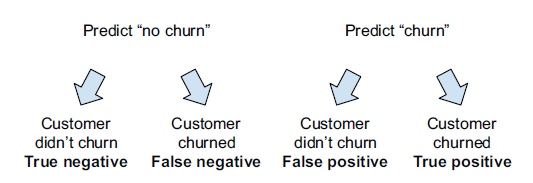

- True negative (TN): we predict False (“no churn”), and the actual label is also
False (“no churn”).
- True positive (TP): we predict True (“churn”), and the actual label is True
(“churn”).
- False negative (FN): we predict False (“no churn”), but it’s actually True (the
customer churned).
- False positive (FP): we predict True (“churn”), but it’s actually False (the customer
stayed with us).

In [112]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [113]:
t = 0.5

predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [114]:
true_positive = (predict_positive & actual_positive).sum()
true_negative = (predict_negative & actual_negative).sum()
true_positive,true_negative

(np.int64(210), np.int64(921))

In [115]:
false_positive = (predict_positive & actual_negative).sum()
false_negative =  (predict_negative & actual_positive).sum()
false_positive,false_negative

(np.int64(102), np.int64(176))

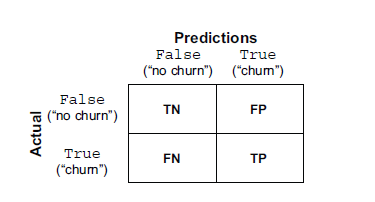

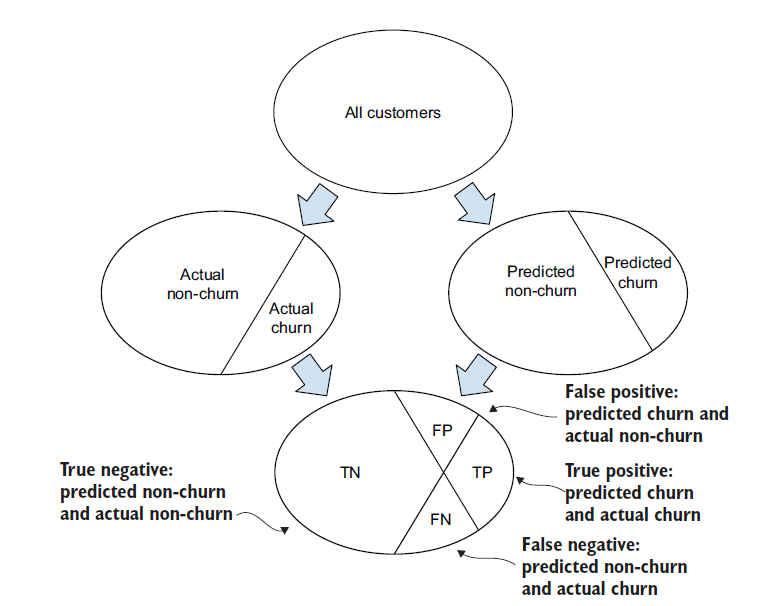

In [116]:
confusion_matrix = np.array(
    [
        [true_negative,false_positive],
        [false_negative,true_positive]
    ]
)
confusion_matrix

array([[921, 102],
       [176, 210]])

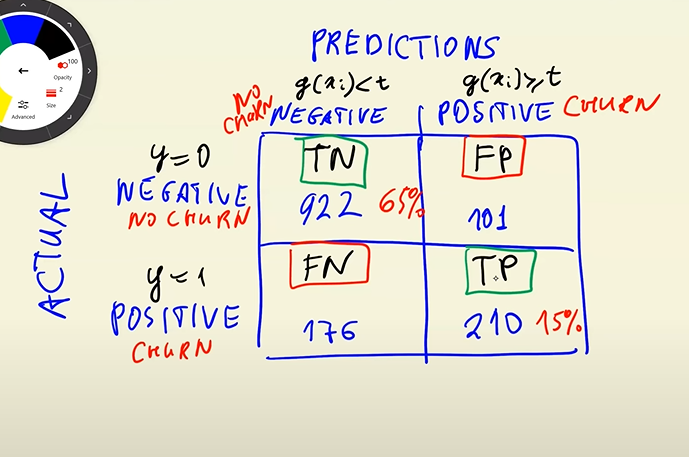

In [117]:
(confusion_matrix/confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

## Precision and Recall
Accuracy can be misleading when dealing with imbalanced datasets.

Both precision and recall are calculated from the values of the confusion table. They both help us understand the quality of the model in cases of class imbalance.

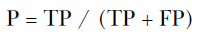

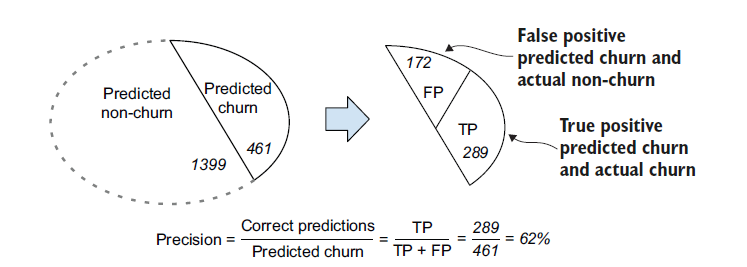

In [118]:
accuracy = (true_positive+true_negative)/ (true_positive+true_negative+false_positive+false_negative)
accuracy

np.float64(0.8026969481902059)

In [119]:
precision = true_positive/(true_positive+false_positive)
precision

np.float64(0.6730769230769231)

Recall

Recall is the fraction of correctly classified positive examples among all positive examples

`R = TP / (TP + FN)`

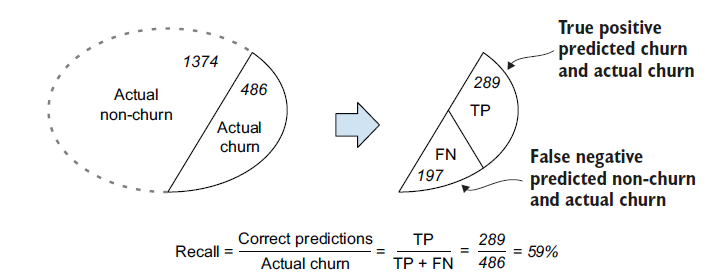

In [120]:
recall = true_positive / (true_positive + false_negative)
recall

np.float64(0.5440414507772021)

- **Precision**: what’s the percent of correct predictions (TP) among customers predicted as churning `(TP + FP)`?
- **Recall**: what’s the percentage correctly predicted as churning (TP) among all churned customers `(TP + FN)`?

## ROC Curve

ROC - ROC stands for “receiver operating characteristic,” and it was initially designed for evaluating the strength of radar detectors during World War II

The ROC curve is based on two quantities, **FPR** and **TPR**:
* False positive rate (**FPR**): the fraction of false positives among all negative examples
* True positive rate (**TPR**): the fraction of true positives among all positive examples
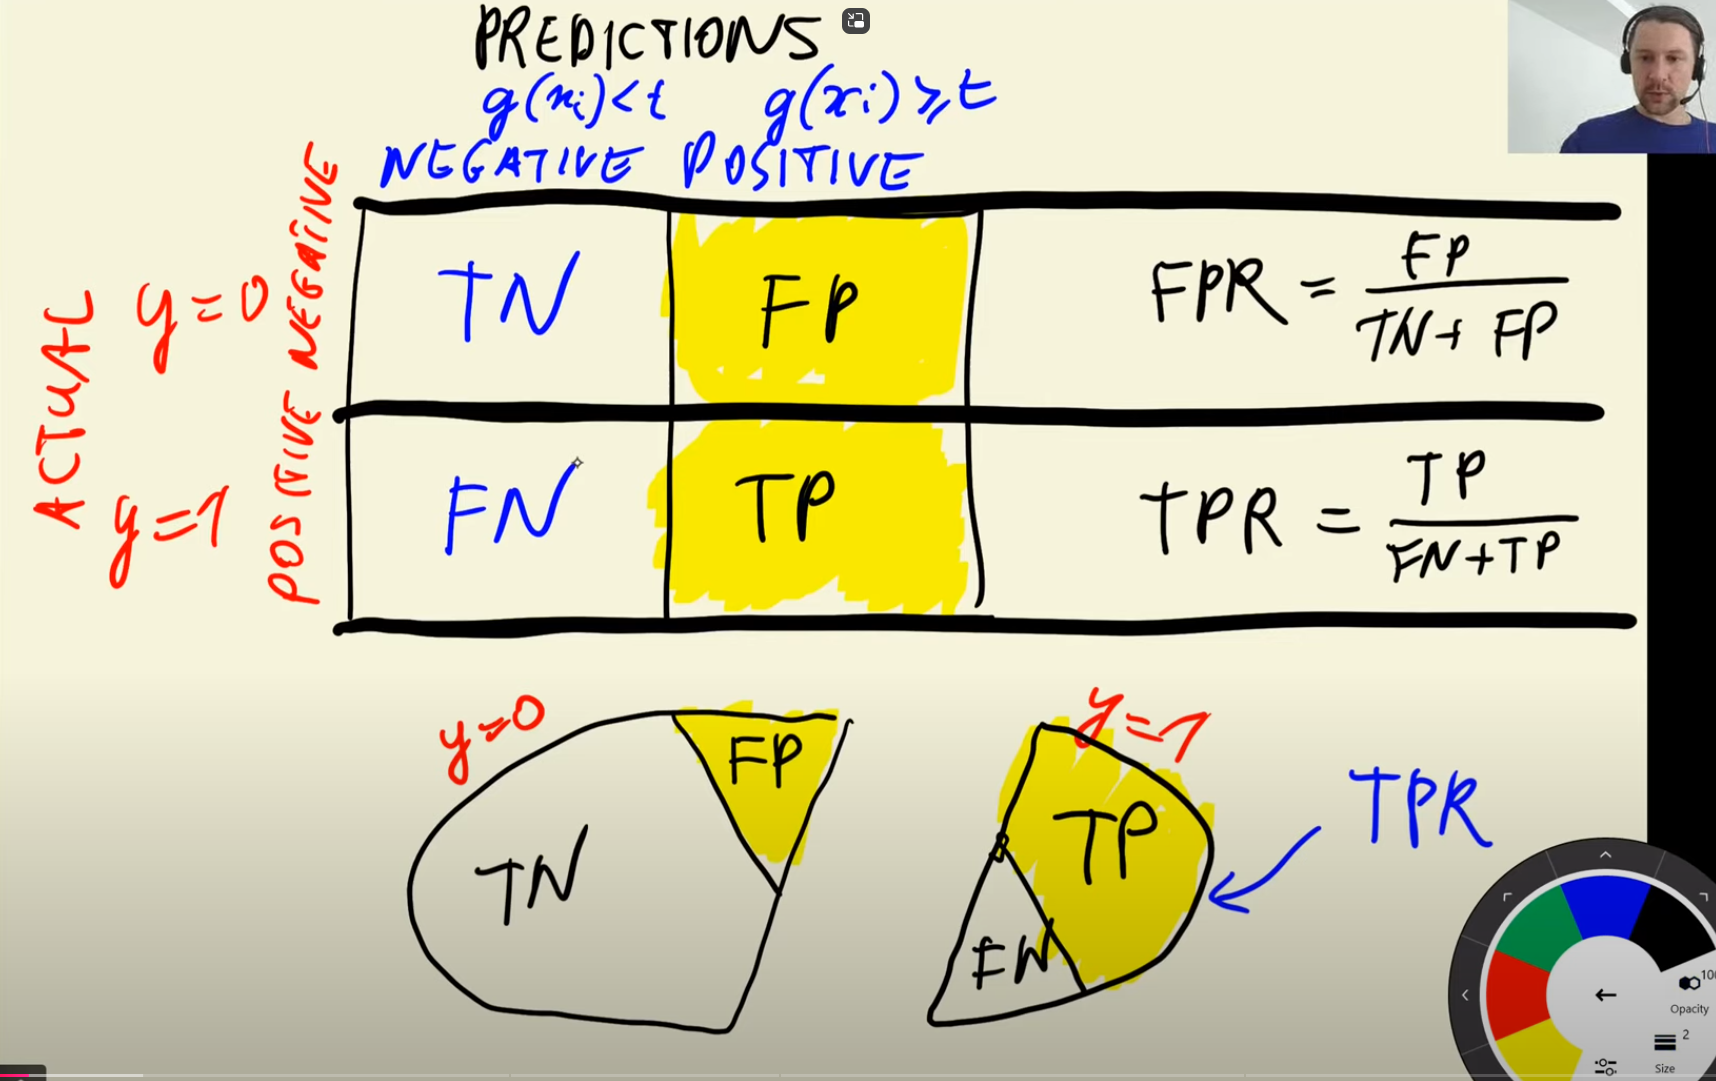

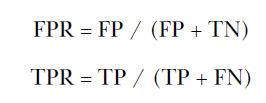

* For FPR, we look at the first row of the table: the fraction of false positives
among all negatives.
* For TPR, we look at the second row of the table: the fraction of true positives
among all positives.

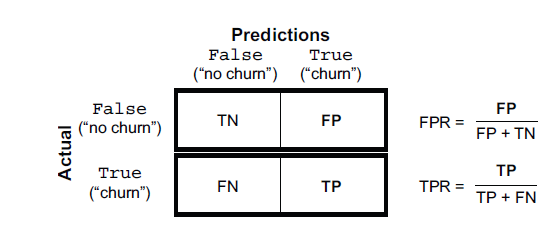

### TPR and FRP

TPR is the fraction of users who we predicted as churning among everybody who actually did churn. Note that TPR is the same as recall, so the higher the TPR is, the better.

In [121]:
tpr = true_positive / (false_negative + true_positive)
tpr

np.float64(0.5440414507772021)

In [122]:
frp = false_positive / (false_positive + true_negative)
frp

np.float64(0.09970674486803519)

In [123]:
thresholds = np.linspace(0,1,101)

scores = []

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    true_positive = (predict_positive & actual_positive).sum()
    true_negative = (predict_negative & actual_negative).sum()

    false_positive = (predict_positive & actual_negative).sum()
    false_negative =  (predict_negative & actual_positive).sum()

    scores.append((t,true_positive,false_positive,true_negative,false_negative))

In [124]:
columns = ['threshold','true_positive','false_positive','true_negative','false_negative']

df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,threshold,true_positive,false_positive,true_negative,false_negative
0,0.00,386,1023,0,0
1,0.01,385,916,107,1
2,0.02,384,831,192,2
3,0.03,383,766,257,3
4,0.04,381,715,308,5
...,...,...,...,...,...
96,0.96,0,0,1023,386
97,0.97,0,0,1023,386
98,0.98,0,0,1023,386
99,0.99,0,0,1023,386


In [125]:
df_scores[::10]

,threshold,true_positive,false_positive,true_negative,false_negative
0,0.0,386,1023,0,0
10,0.1,366,556,467,20
20,0.2,333,357,666,53
30,0.3,284,236,787,102
40,0.4,249,166,857,137
50,0.5,210,102,921,176
60,0.6,150,53,970,236
70,0.7,75,19,1004,311
80,0.8,12,1,1022,374
90,0.9,0,0,1023,386


In [126]:
df_scores['fpr'] = df_scores.false_positive / (df_scores.false_positive + df_scores.true_negative)
df_scores['tpr'] = df_scores.true_positive / (df_scores.false_negative + df_scores.true_positive)

In [127]:
df_scores[::10]

,threshold,true_positive,false_positive,true_negative,false_negative,fpr,tpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,366,556,467,20,0.543500,0.948187
20,0.2,333,357,666,53,0.348974,0.862694
30,0.3,284,236,787,102,0.230694,0.735751
40,0.4,249,166,857,137,0.162268,0.645078
50,0.5,210,102,921,176,0.099707,0.544041
60,0.6,150,53,970,236,0.051808,0.388601
70,0.7,75,19,1004,311,0.018573,0.194301
80,0.8,12,1,1022,374,0.000978,0.031088
90,0.9,0,0,1023,386,0.000000,0.000000


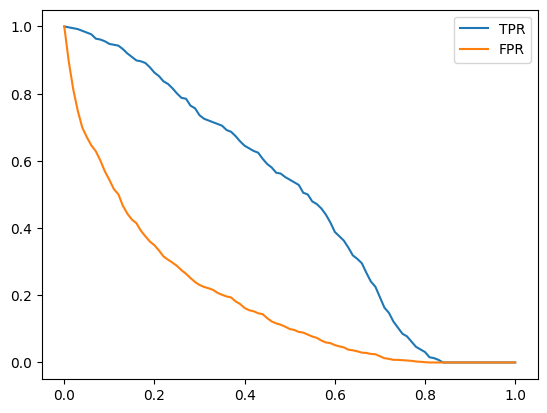

In [128]:
plt.plot(df_scores.threshold, df_scores.tpr, label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, label='FPR')
plt.legend()

Both TPR and FPR start at 100% — at the threshold of 0.0, we predict “churn” for
everyone:

- FPR is 100% because we have only false positives in the prediction. There are no true negatives: nobody is predicted as non-churning.
- TPR is 100% because we have only true positives and no false negatives. As the threshold grows, both metrics decline but at different rates.

Ideally, FPR should go down very quickly. A small FPR indicates that the model makes very few mistakes predicting negative examples (false positives)

### Random baseline Model
A random model outputs a random score between 0 and 1, regardless of the input.

we can simply pretend that y_rand contains the predictions of our “model.” Let’s calculate FPR and TPR for our random model.

At the threshold of 0.0, we treat everybody as churning. Both TPR and FPR are 100%:
- FPR is 100% because we have only false positives: all non-churning customers are identified as churning.
- TPR is 100% because we have only true positives: we can correctly classify all churning customers as churning.
  
As we increase the threshold, both TPR and FPR decrease. At the threshold of 0.4, the model with a probability of 40% predicts “non-churn,” and with a probability of 60% predicts “churn.” Both TPR and FPR are 60%:

- FPR is 60% because we incorrectly classify 60% of non-churning customers as churning.
- TPR is 60% because we correctly classify 60% of churning customers as churning.
  
Finally, at 1.0, both TPR and FPR are 0%. At this threshold, we predict everybody as non-churning:

- FPR is 0% because we have no false positives: we can correctly classify all nonchurning customers as non-churning.
- TPR is 0% because we have no true positives: all churning customers are identified as non-churning.

In [129]:
np.random.seed(1)

y_rand = np.random.uniform(0,1,size=len(y_val))

In [130]:
((y_rand >= 0.5) == y_val).mean()

np.float64(0.5017743080198722)

In [131]:
def tpr_fpr_dataframe(y_val,y_pred):
    thresholds = np.linspace(0,1,101)

    scores = []
    
    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
    
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
    
        true_positive = (predict_positive & actual_positive).sum()
        true_negative = (predict_negative & actual_negative).sum()
    
        false_positive = (predict_positive & actual_negative).sum()
        false_negative =  (predict_negative & actual_positive).sum()
    
        scores.append((t,true_positive,false_positive,true_negative,false_negative))
        
    columns = ['threshold','true_positive','false_positive','true_negative','false_negative']

    df_scores = pd.DataFrame(scores, columns=columns)
    df_scores['fpr'] = df_scores.false_positive / (df_scores.false_positive + df_scores.true_negative)
    df_scores['tpr'] = df_scores.true_positive / (df_scores.false_negative + df_scores.true_positive)

    return df_scores

In [132]:
df_rand = tpr_fpr_dataframe(y_val,y_rand)

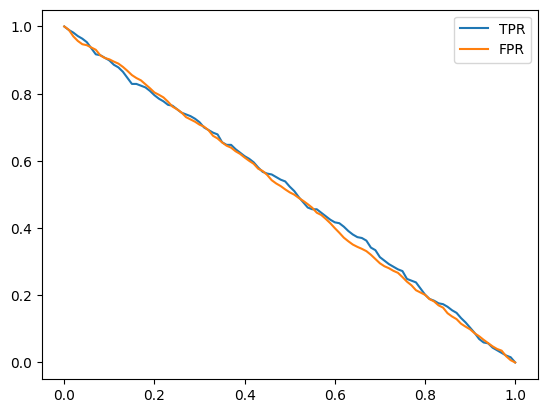

In [133]:
plt.plot(df_rand.threshold, df_rand.tpr, label='TPR')
plt.plot(df_rand.threshold, df_rand.fpr, label='FPR')
plt.legend()

### Ideal Model
The ideal model always makes correct decisions.

This model outputs scores in such a way that churning customers always have higher scores than non-churning ones. In other words, the predicted probability for all churned ones should be higher than the predicted probability for non-churned ones.
So, if we apply the model to all the customers in our validation set and then sort them by the predicted probability, we first will have all the non-churning customers, followed by the churning ones

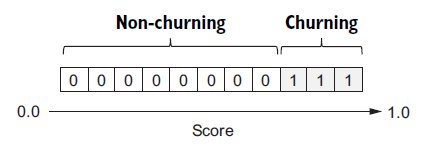

Of course, we cannot have such a model in real life. It’s still useful, however: we can use it for comparing our TPR and FPR to the TPR and FPR of the ideal model

In [134]:
# Calculate the number of negative and positive examples

num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg,num_pos

(np.int64(1023), np.int64(386))

In [135]:
y_ideal = np.repeat([0,1],[num_neg,num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1])

In [136]:
y_ideal_pred = np.linspace(0,1,len(y_val))
y_ideal_pred

array([0.00000000e+00, 7.10227273e-04, 1.42045455e-03, ...,
       9.98579545e-01, 9.99289773e-01, 1.00000000e+00])

In [137]:
1 - y_val.mean()

np.float64(0.7260468417317246)

In [138]:
((y_ideal_pred >= 0.726) == y_ideal).mean()

np.float64(1.0)

In [139]:
df_ideal = tpr_fpr_dataframe(y_ideal,y_ideal_pred)

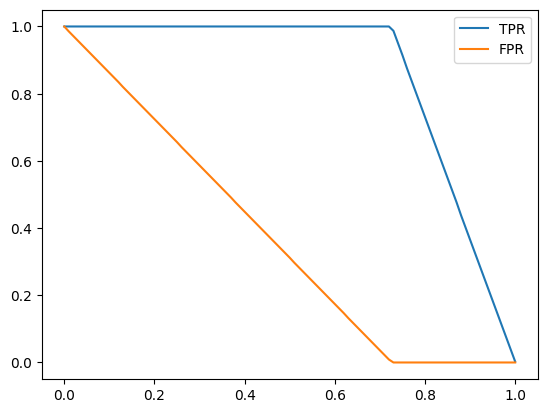

In [140]:
plt.plot(df_ideal.threshold, df_ideal.tpr, label='TPR')
plt.plot(df_ideal.threshold, df_ideal.fpr, label='FPR')
plt.legend()

From the plot, we can see that
- Both TPR and FPR start at 100% and end at 0%.
- For thresholds lower than 0.74, we always correctly classify all churning customers as churning; that’s why TRP stays at 100%. On the other hand, we incorrectly classify some non-churning ones as churning — those are our false positives. As we increase the threshold, fewer and fewer non-churning customers are classified as churning, so FPR goes down. At 0.6, we misclassify 258 non-churning customers as churning
- The threshold of 0.74 is the ideal situation: all churning customers are classified as churning, and all non-churning are classified as non-churning; that’s why TPR is 100% and FPR is 0%.
- Between 0.74 and 1.0, we always correctly classify all non-churning customers, so FPR stays at 0%. However, as we increase the threshold, we start incorrectly
classifying more and more churning customers as non-churning, so TPR goes down. At 0.8, 114 out of 446 churning customers are incorrectly classified
as non-churning. Only 372 predictictions are correct, so TPR is 76%

Placing everything together

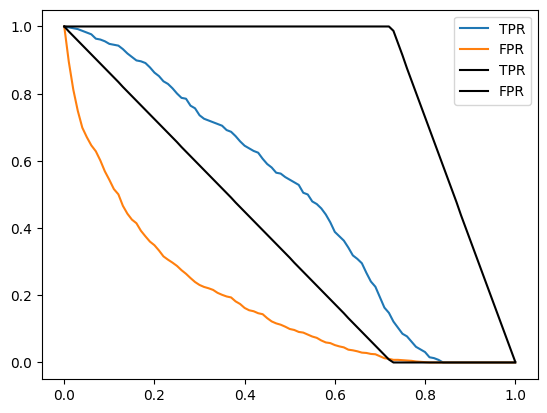

In [141]:
plt.plot(df_scores.threshold, df_scores.tpr, label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, label='FPR')

plt.plot(df_ideal.threshold, df_ideal.tpr, label='TPR',color='black')
plt.plot(df_ideal.threshold, df_ideal.fpr, label='FPR',color='black')
plt.legend()

### ROC Curve

In [142]:
%matplotlib inline

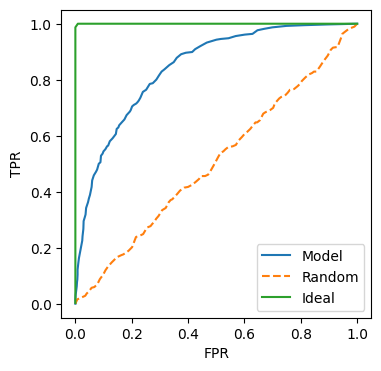

In [143]:
plt.figure(figsize=(4,4))

plt.plot(df_scores.fpr, df_scores.tpr, label='Model')
plt.plot(df_rand.fpr, df_rand.tpr, label='Random',linestyle='--')
plt.plot(df_ideal.fpr, df_ideal.tpr, label='Ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

Computing roc curve using scikit learn

In [144]:
from sklearn.metrics import roc_curve

In [145]:
fpr, tpr, thresholds = roc_curve(y_val,y_pred)

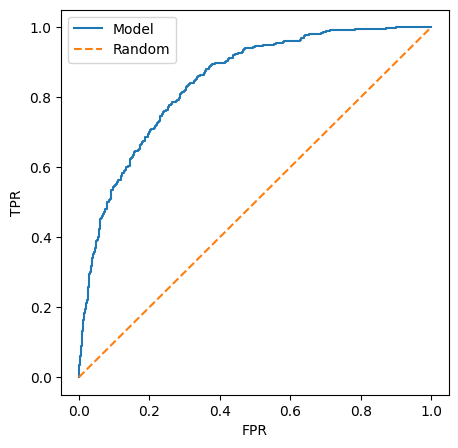

In [146]:
plt.figure(figsize=(5,5))

plt.plot(fpr,tpr,label='Model')
plt.plot([0,1],[0,1],label='Random',linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

## ROC Area Under the Curve (AUC)

In [147]:
from sklearn.metrics import auc,roc_auc_score

In [148]:
auc(fpr,tpr)

np.float64(0.8438884921418767)

In [149]:
auc(df_scores.fpr,df_scores.tpr)

np.float64(0.8436415804375021)

In [150]:
auc(df_ideal.fpr,df_ideal.tpr)

np.float64(0.9999430203759136)

In [151]:
fpr,tpr,thresholds = roc_curve(y_val,y_pred)
auc(fpr,tpr)

np.float64(0.8438884921418767)

In [152]:
# Short cut for the previous cell
roc_auc_score(y_val,y_pred)

np.float64(0.8438884921418767)

In [153]:
# AUC in practice
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [154]:
import random

In [155]:
n=100000

success=0

for i in range(n):
    pos_ind=random.randint(0,len(pos)-1)
    neg_ind=random.randint(0,len(neg)-1)

    if pos[pos_ind] > neg[neg_ind]:
        success = success + 1

success/n

0.84393

In [156]:
# With numpy instead

np.random.seed(1)

pos_ind = np.random.randint(0,len(pos),size=n)
neg_ind = np.random.randint(0,len(neg),size=n)

(pos[pos_ind] > neg[neg_ind]).mean()

np.float64(0.84287)

## Cross Validation

In [176]:
def train_model(df_train,y_train,C=1.0):
    dicts= df_train[categorical+numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C,max_iter=1000)
    model.fit(X_train,y_train)

    return dv,model

In [177]:
dv,model = train_model(df_train,y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [178]:
def predict(df,dv,model):
    dicts = df[categorical+numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:,1]
    return y_pred

In [179]:
predict(df_val,dv,model)

array([0.16556301, 0.00482301, 0.67339528, 0.07466353, 0.59378384,
       0.30748838, 0.29873067, 0.22405545, 0.00279615, 0.08621486,
       0.05023144, 0.01251997, 0.48700285, 0.73671515, 0.32748844,
       0.19932605, 0.65306246, 0.25402323, 0.27424869, 0.03013986,
       0.68896983, 0.02441305, 0.00293855, 0.51369937, 0.75382536,
       0.08289547, 0.73153558, 0.02886722, 0.66695455, 0.00971212,
       0.03692955, 0.0086085 , 0.43875076, 0.55352473, 0.14021339,
       0.03207756, 0.5286282 , 0.15414807, 0.74326528, 0.63938227,
       0.3355106 , 0.28040808, 0.73230114, 0.00701137, 0.00212512,
       0.57921152, 0.41469177, 0.31146546, 0.09159729, 0.4872256 ,
       0.00729603, 0.00643371, 0.54402291, 0.61213134, 0.19720118,
       0.084661  , 0.0046425 , 0.43671842, 0.01890243, 0.00399779,
       0.02089934, 0.6862379 , 0.27395937, 0.06167528, 0.648728  ,
       0.03403111, 0.73702002, 0.07675381, 0.1809212 , 0.01671467,
       0.42510091, 0.39087718, 0.50508823, 0.18875138, 0.70434

In [180]:
from sklearn.model_selection import KFold

In [181]:
k_fold = KFold(n_splits=10,shuffle=True,random_state=1)

In [182]:
# Taking a sneak peak into the data
next(k_fold.split(df_full_train))

(array([   0,    1,    2, ..., 5631, 5632, 5633]),
 array([   4,   21,   28,   33,   44,   58,   67,   72,   79,   81,   82,
          98,  101,  116,  119,  125,  126,  136,  141,  147,  161,  169,
         179,  192,  196,  200,  206,  214,  222,  231,  250,  255,  259,
         276,  280,  285,  301,  308,  313,  314,  325,  343,  354,  359,
         383,  386,  407,  420,  428,  433,  440,  447,  457,  473,  486,
         496,  501,  503,  507,  545,  554,  557,  566,  574,  580,  582,
         592,  605,  608,  623,  634,  636,  645,  662,  667,  684,  687,
         689,  729,  745,  758,  763,  778,  783,  792,  795,  808,  839,
         840,  847,  850,  858,  867,  870,  871,  881,  899,  906,  927,
         929,  931,  940,  943,  976,  984,  987,  988, 1005, 1016, 1028,
        1034, 1038, 1050, 1056, 1074, 1079, 1117, 1122, 1123, 1131, 1134,
        1139, 1144, 1155, 1159, 1163, 1169, 1179, 1198, 1206, 1216, 1238,
        1247, 1256, 1272, 1297, 1298, 1310, 1344, 1356, 1370,

In [183]:
%pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [199]:
from tqdm.auto import tqdm

In [200]:
n_splits = 5
for C in tqdm([0.001, 0.01, 0.1 ,0.5,1,5,10]):
    scores = []
    
    for train_idx, val_idx  in k_fold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
    
        y_train = df_train.churn.values
        y_val = df_val.churn.values
    
        dv,model = train_model(df_train,y_train,C)
        y_pred = predict(df_val,dv,model)
    
        auc = roc_auc_score(y_val,y_pred)
        scores.append(auc)
    print('C=%s, mean = %.3f, standard deviation = %.3f'% (C,np.mean(scores),np.std(scores)))

 14%|████▍                          | 1/7 [00:02<00:16,  2.68s/it]

C=0.001, mean = 0.826, standard deviation = 0.012


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C=0.01, mean = 0.841, standard deviation = 0.012


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C=0.1, mean = 0.842, standard deviation = 0.012


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C=0.5, mean = 0.843, standard deviation = 0.012


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C=1, mean = 0.843, standard deviation = 0.012


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C=5, mean = 0.843, standard deviation = 0.012


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C=10, mean = 0.843, standard deviation = 0.012


In [201]:
scores

[np.float64(0.8498958383028801),
 np.float64(0.8424814356435644),
 np.float64(0.8583957610085876),
 np.float64(0.8331577647930211),
 np.float64(0.8245037220843672),
 np.float64(0.8414918414918416),
 np.float64(0.8430478671442526),
 np.float64(0.825466476913346),
 np.float64(0.8459611679264859),
 np.float64(0.8613996168196028)]

In [196]:
print('C=%s, mean = %.3f, standard deviation = %.3f'% (C,np.mean(scores),np.std(scores)))

C=10, mean = 0.843, standard deviation = 0.012
